# 🐇 Object Detection

### 📥 Importing

In [13]:
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from msrest.authentication import ApiKeyCredentials
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
from matplotlib.patches import Rectangle

# Thanks to **dhaitz**!
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

# 한글폰트 설정
import matplotlib as mpl
mpl.rc('font', family='D2Coding')
mpl.rcParams['axes.unicode_minus'] = False

### 🔐 Azure 리소스 엔드포인트 설정 및 인증

In [ ]:
prediction_endpoint = "https://cv6b039-prediction.cognitiveservices.azure.com/"
prediction_key = "!!! THIS IS SECRET CODE !!!"
project_id = "914a624d-e439-429b-a8de-fd8c80bc3275"
model_name = "Iteration2"

credentials = ApiKeyCredentials(in_headers={"Prediction-key": prediction_key})
predictor = CustomVisionPredictionClient(endpoint=prediction_endpoint, credentials=credentials)

### 🐇 객체 검출

Detecting objects in "./dataset/번지찾기/test-1.png"
Bungee: 20.05% left=0.16025272 top=0.3834512 width=0.46426257 height=0.5002078
Results saved in outputs/object-detection/output-1.jpg


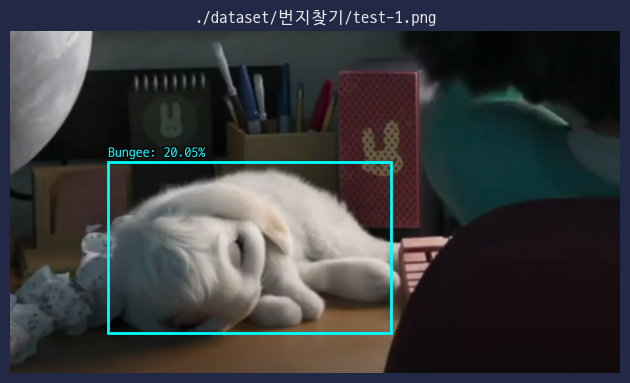

Detecting objects in "./dataset/번지찾기/test-2.png"
Bungee: 21.31% left=0.09686975 top=0.19627973 width=0.2994541 height=0.8037193
Results saved in outputs/object-detection/output-2.jpg


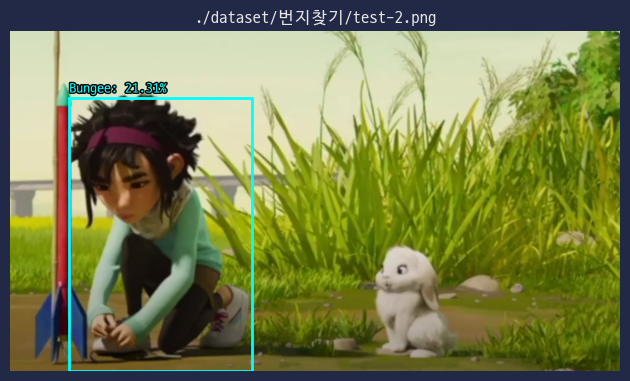

Detecting objects in "./dataset/번지찾기/test-3.png"
Bungee: 16.67% left=0.88703537 top=0.43126565 width=0.076176405 height=0.1977104
Results saved in outputs/object-detection/output-3.jpg


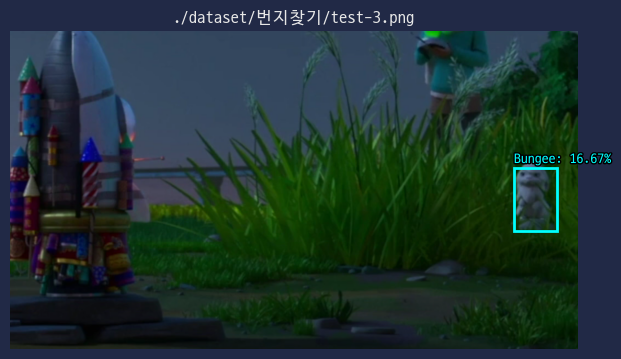

Detecting objects in "./dataset/번지찾기/test-4.png"
Results saved in outputs/object-detection/output-4.jpg


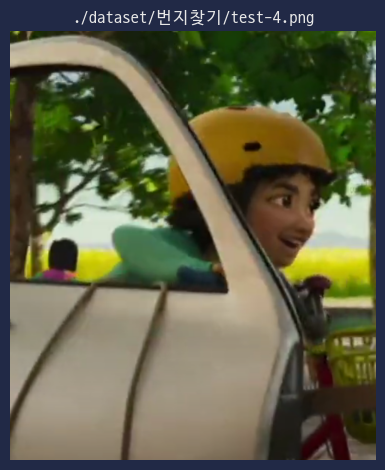

Detecting objects in "./dataset/번지찾기/test-5.png"
Bungee: 13.47% left=0.13131501 top=0.22790308 width=0.42789137 height=0.46572077
Results saved in outputs/object-detection/output-5.jpg


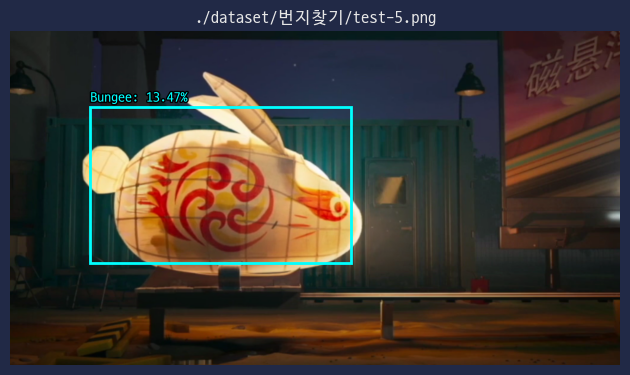

Detecting objects in "./dataset/번지찾기/test-6.png"
Bungee: 16.42% left=0.24607643 top=0.15853962 width=0.7028327 height=0.8272767
Results saved in outputs/object-detection/output-6.jpg


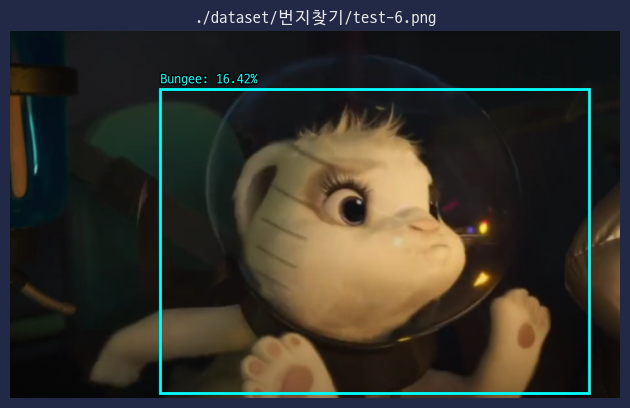

Detecting objects in "./dataset/번지찾기/test-7.png"
Results saved in outputs/object-detection/output-7.jpg


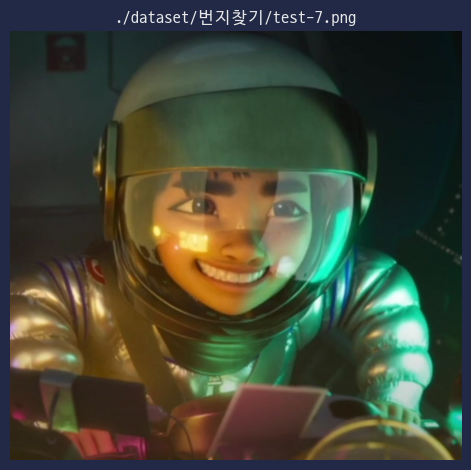

Detecting objects in "./dataset/번지찾기/test-8.png"
Results saved in outputs/object-detection/output-8.jpg


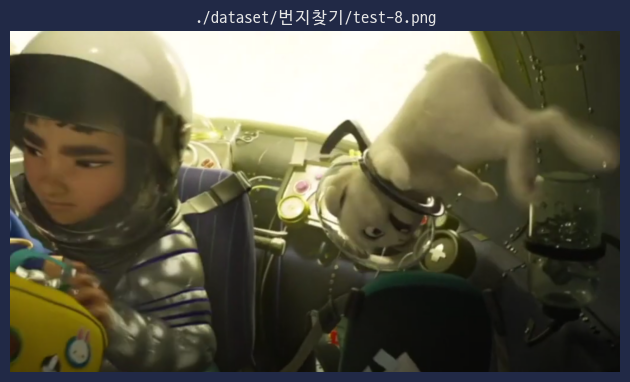

Detecting objects in "./dataset/번지찾기/test-9.png"
Bungee: 62.09% left=0.30227643 top=0.50579476 width=0.3953095 height=0.46773797
Results saved in outputs/object-detection/output-9.jpg


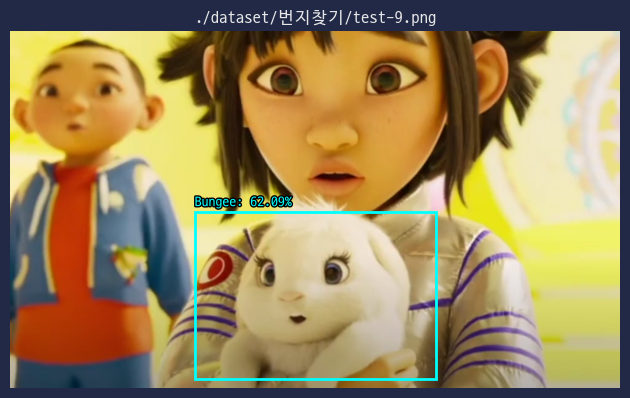

Detecting objects in "./dataset/번지찾기/test-10.png"
Bungee: 18.63% left=0.34069362 top=0.051937163 width=0.3095022 height=0.7330239
Results saved in outputs/object-detection/output-10.jpg


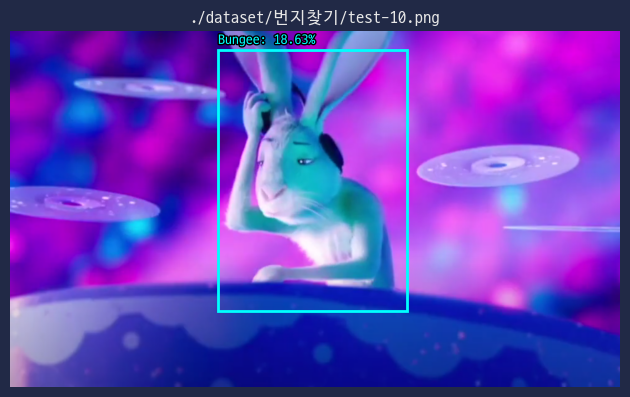

Detecting objects in "./dataset/번지찾기/test-11.png"
Bungee: 13.20% left=0.26339313 top=0.88554996 width=0.079028815 height=0.070348084
Results saved in outputs/object-detection/output-11.jpg


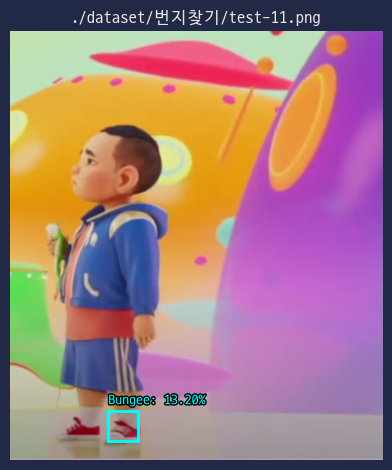

Detecting objects in "./dataset/번지찾기/test-12.png"
Bungee: 29.01% left=0.109190464 top=0.14206082 width=0.28239447 height=0.76271725
Results saved in outputs/object-detection/output-12.jpg


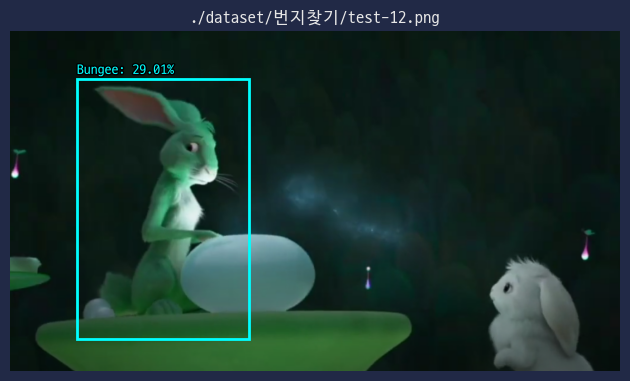

Detecting objects in "./dataset/번지찾기/test-13.png"
Bungee: 14.61% left=0.36456963 top=0.35960713 width=0.31519786 height=0.6403918
Results saved in outputs/object-detection/output-13.jpg


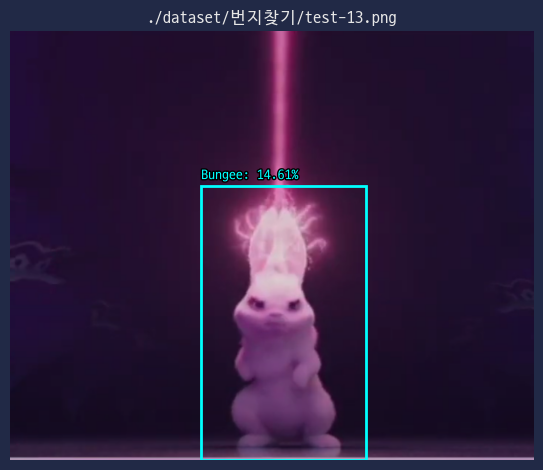

Detecting objects in "./dataset/번지찾기/test-14.png"
Results saved in outputs/object-detection/output-14.jpg


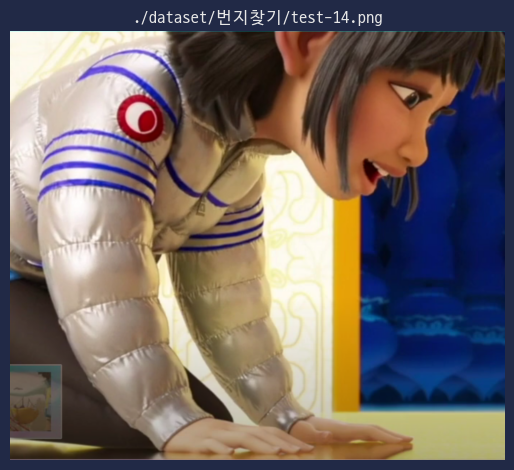

Detecting objects in "./dataset/번지찾기/test-15.png"
Results saved in outputs/object-detection/output-15.jpg


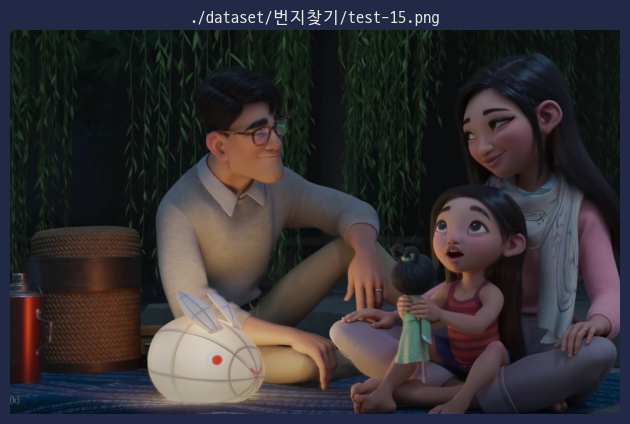

In [12]:
images = [f'./dataset/번지찾기/test-{i}.png' for i in range(1, 16)]

for i, image_file in enumerate(images, 1):
    print(f'Detecting objects in "{image_file}"')
    image = Image.open(image_file)
    h, w, ch = np.array(image).shape

    plt.axis('off')
    plt.title(f'{image_file}')
    plt.imshow(image)
    
    """ 예측 수행 """
    with open(image_file, mode="rb") as image_data:
        results = predictor.detect_image(project_id, model_name, image_data)
        
    for prediction in results.predictions[:5]:
        if prediction.probability < 0.1:
            break
        pred = f'{prediction.tag_name}: {prediction.probability * 100:.2f}%'
        print(
            f'{pred} '
            f'left={prediction.bounding_box.left} '
            f'top={prediction.bounding_box.top} '
            f'width={prediction.bounding_box.width} '
            f'height={prediction.bounding_box.height}'
        )
        
        left = prediction.bounding_box.left * w
        top = prediction.bounding_box.top * h
        width = prediction.bounding_box.width * w
        height = prediction.bounding_box.height * h
        points = ((left,top), (left+width,top), (left+width,top+height), (left,top+height),(left,top))
        plt.gca().add_patch(Rectangle((left, top), width, height, linewidth=2, edgecolor='cyan', facecolor='none'))
        plt.annotate(pred, (left, top - 12), color='cyan', path_effects=[pe.withStroke(linewidth=2, foreground="black")])
    
    plt.tight_layout()
    outputfile = f'outputs/object-detection/output-{i}.jpg'
    plt.savefig(outputfile)
    print('Results saved in', outputfile)
    plt.show()